In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(64))
classifier.add(Dropout(0.5))
classifier.add(Activation('relu'))

classifier.add(Dense(3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.30)

training_set = train_datagen.flow_from_directory('Images/Train_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=42, 
                                                 subset='training' )

validation_set = train_datagen.flow_from_directory('Images/Train_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=42, 
                                                 subset='validation')

batch_size = 32

                    
classifier.summary()

Found 4943 images belonging to 3 classes.
Found 2116 images belonging to 3 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
____________________________________

In [14]:
#training the CNN model
hist = classifier.fit_generator( training_set, 
                                steps_per_epoch = training_set.samples // batch_size,
                                validation_data = validation_set, 
                                validation_steps = validation_set.samples // batch_size, 
                                epochs = 90,
                                workers=12, max_queue_size=100)                                

                                                                                                



Epoch 1/90
154/154 [==============================] - 22s 142ms/step - loss: 0.9328 - accuracy: 0.5453 - val_loss: 0.8278 - val_accuracy: 0.6477
Epoch 2/90
154/154 [==============================] - 23s 147ms/step - loss: 0.7981 - accuracy: 0.6526 - val_loss: 0.7864 - val_accuracy: 0.6507
Epoch 3/90
154/154 [==============================] - 23s 150ms/step - loss: 0.7510 - accuracy: 0.6709 - val_loss: 0.6698 - val_accuracy: 0.7039
Epoch 4/90
154/154 [==============================] - 23s 149ms/step - loss: 0.7207 - accuracy: 0.6897 - val_loss: 0.6771 - val_accuracy: 0.7054
Epoch 5/90
154/154 [==============================] - 24s 154ms/step - loss: 0.6784 - accuracy: 0.7080 - val_loss: 0.8384 - val_accuracy: 0.7236
Epoch 6/90
154/154 [==============================] - 23s 152ms/step - loss: 0.6511 - accuracy: 0.7231 - val_loss: 0.6221 - val_accuracy: 0.7366
Epoch 7/90
154/154 [==============================] - 23s 149ms/step - loss: 0.6430 - accuracy: 0.7198 - val_loss: 0.5223 - val_ac

154/154 [==============================] - 25s 162ms/step - loss: 0.2507 - accuracy: 0.9054 - val_loss: 0.5554 - val_accuracy: 0.8013
Epoch 58/90
154/154 [==============================] - 23s 152ms/step - loss: 0.2394 - accuracy: 0.8991 - val_loss: 0.5562 - val_accuracy: 0.8129
Epoch 59/90
154/154 [==============================] - 24s 158ms/step - loss: 0.2557 - accuracy: 0.8956 - val_loss: 0.5077 - val_accuracy: 0.8220
Epoch 60/90
154/154 [==============================] - 24s 156ms/step - loss: 0.2499 - accuracy: 0.8974 - val_loss: 0.8193 - val_accuracy: 0.8138
Epoch 61/90
154/154 [==============================] - 24s 153ms/step - loss: 0.2417 - accuracy: 0.9024 - val_loss: 1.3005 - val_accuracy: 0.7917
Epoch 62/90
154/154 [==============================] - 24s 154ms/step - loss: 0.2360 - accuracy: 0.9013 - val_loss: 0.8955 - val_accuracy: 0.8311
Epoch 63/90
154/154 [==============================] - 25s 164ms/step - loss: 0.2525 - accuracy: 0.8972 - val_loss: 0.7061 - val_accurac

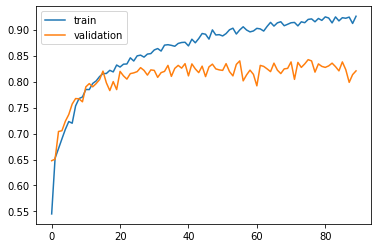

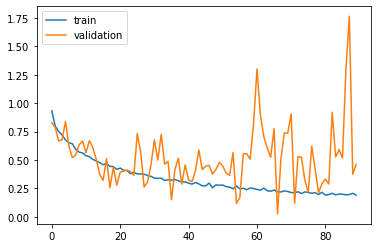

In [25]:

import matplotlib.pyplot as plt
train_loss = hist.history['loss']
train_acc = hist.history['accuracy']

val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('models/acc.png')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('models/loss.png')
plt.show()



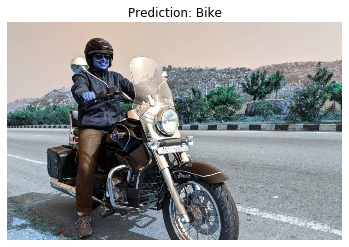

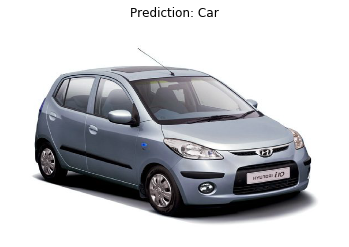

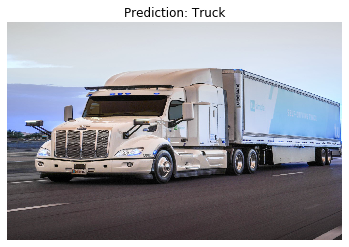

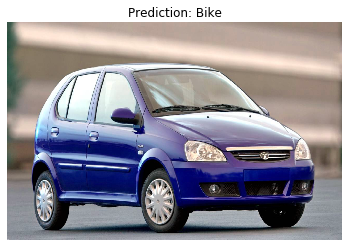

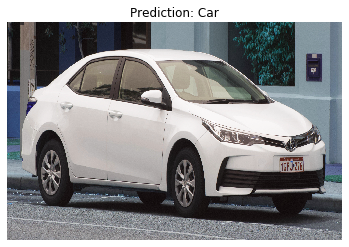

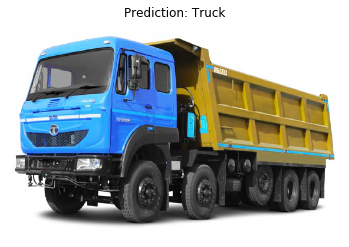

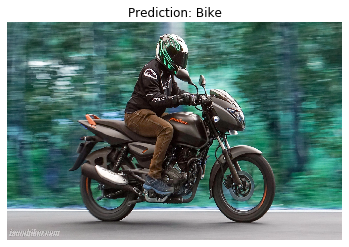

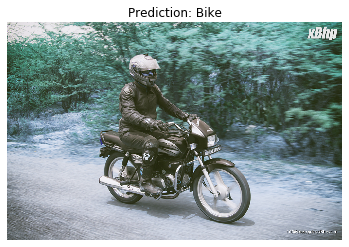

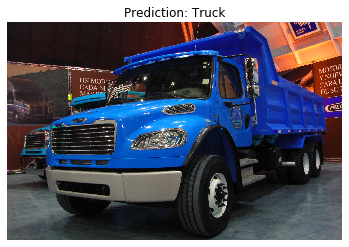

In [18]:
import cv2
import tensorflow as tf
import numpy as np

def prepare(filepath):
    IMG_SIZE = 64
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

def prepare_show(filepath):
    IMG_SIZE = 1024
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE, 3)

CATEGORIES = ["Bike","Car","Truck"]

for i in range(1,10):
    img_dir = "Images/Test_dataset/test "+ str(i) +".jpg"
    img_data = prepare_show(img_dir)
    
  
    prediction = classifier.predict([prepare(img_dir)])
    predict_label = CATEGORIES[int(np.argmax(prediction[0]))]
    
    fig = plt.subplots()
    plt.title("Prediction: " + predict_label)
    plt.axis("off")
    plt.imshow(img_data[0], aspect = "auto")